In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Preprocessing the input data

In [ ]:
# loading the dataset to a Pandas DataFrame

wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
# Create binary classification: good (1) vs. bad (0)
wine_dataset['quality'] = wine_dataset['quality'].apply(lambda x: 1 if x >= 5 else 0)

# Split the dataset into features (X) and target (y)
X = wine_dataset.drop('quality', axis=1).values
y = wine_dataset['quality'].values

# Feature scaling: Normalize the features (z-score standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Logistic Regression, cost function and ...

Gradient descent: minimize the cost function and update the weights & bias.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, weights, bias):
    m = len(X)  # number of training examples
    # Predictions using the sigmoid function
    predictions = sigmoid(np.dot(X, weights) + bias)
    # Cost function: Binary Cross-Entropy / Log-Loss
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    m = len(X) # function m = X.shape[0] is more recommended/universal than len(X)
    costs = []

    for i in range(num_iterations):
        # Forward pass (compute predictions)
        predictions = sigmoid(np.dot(X, weights) + bias)

        # Compute the gradients (partial derivatives)
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)

        # Update the parameters (weights and bias)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute the cost and save it for plotting
        cost = cost_function(X, y, weights, bias)
        costs.append(cost)

        # Print the cost every 100 iterations to track progress
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return weights, bias, costs


Train the Logistic regression model




In [ ]:
# Initialize weights and bias
weights = np.zeros(X_train.shape[1])  # Number of features in X_train
bias = 0

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the model using gradient descent
weights, bias, costs = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)


Iteration 0, Cost: 0.6910
Iteration 100, Cost: 0.5237
Iteration 200, Cost: 0.4203
Iteration 300, Cost: 0.3536
Iteration 400, Cost: 0.3085
Iteration 500, Cost: 0.2768
Iteration 600, Cost: 0.2538
Iteration 700, Cost: 0.2364
Iteration 800, Cost: 0.2231
Iteration 900, Cost: 0.2126


Evaluate the Wine model
+ Precision: Of all the wines predicted as "good", how many were actually good.
+ Recall: Of all the wines that were actually good, how many were predicted correctly.
+ F1-Score: The harmonic mean of precision and recall, giving a single metric that balances the two.

In [ ]:
def predict(X, weights, bias):
    # Compute the model's predictions (probabilities)
    predictions = sigmoid(np.dot(X, weights) + bias)
    # Convert probabilities to binary predictions (0 or 1)
    return (predictions >= 0.5).astype(int)

# Predict on the test data
y_pred = predict(X_test, weights, bias)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

  # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  # Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

  # Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)




Accuracy: 0.9656
Confusion Matrix:
[[  0  11]
 [  0 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.48      0.50      0.49       320
weighted avg       0.93      0.97      0.95       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Visualize how the cost function decreases over iterations during training

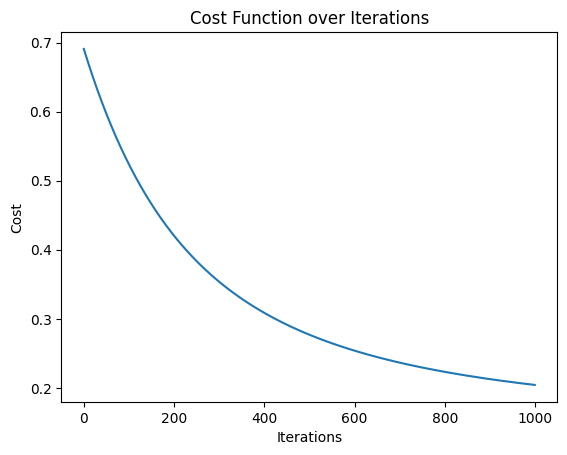

In [ ]:
# Plot the cost function over iterations
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


# A. Build a Predictive model (single manual input)

In [ ]:
new_input = np.array([11.0,0.2,0.48,2.0,0.34299999999999997,6.0,1.0,0.9979,3.3,0.71,10.5])  # 11 (wine chemical) features


# Function to validate the input (note: flawed dataset!!!)
'''
def validate_input(features):
    # Valid ranges for features
    if not (4.6 <= features[0] <= 15.9):  # Fixed Acidity
        return False
    if not (0.12 <= features[1] <= 1.58):  # Volatile Acidity
        return False
    if not (0 <= features[2] <= 1.66):  # Citric Acid
        return False
    if not (0.9 <= features[3] <= 15.5):  # Residual Sugar
        return False
    if not (0.01 <= features[4] <= 0.61):  # Chlorides
        return False
    if not (0 <= features[5] <= 70):  # Free Sulfur Dioxide
        return False
    if not (60 <= features[6] <= 150):  # Total Sulfur Dioxide
        return False
    if not (0.99 <= features[7] <= 1.04):  # Density
        return False
    if not (2.74 <= features[8] <= 4.01):  # pH
        return False
    if not (0.33 <= features[9] <= 2):  # Sulphates
        return False
    if not (8.4 <= features[10] <= 15):  # Alcohol
        return False
    return True

if validate_input(new_input):
    # Proceed with prediction
else:
    print("Giá trị thông số bất thường/chưa hợp lý. Vui lòng nhập lại ")
'''
y_pred = predict(new_input.reshape(1, -1), weights, bias)  # Make prediction
print("11 thông số của sản phẩm rượu cần đánh giá:\n", new_input)
if (y_pred[0]==1):
  print('\n Chất lượng rượu tốt\n\n')
else:
  print('\n Chất lượng rượu không tốt - Loại bỏ sản phẩm này\n\n')

11 thông số của sản phẩm rượu cần đánh giá:
 [11.    0.2   0.48  2.    0.34  6.    1.    1.    3.3   0.71 10.5 ]

 Chất lượng rượu tốt




# B. Mô phỏng đơn giản chiến lược marketing của hãng (Tạo 50 mẫu input ngẫu nhiên)

Lấy vd: sản phẩm hãng Altano Douro Red - bộ dataset rượu đỏ được dựa trên hãng này

Bước 1: Tạo ngẫu nhiên giá trị cho 11 thông số của 1 mẫu sản phẩm, vận dụng các công cụ từ thư viện numPy

  *Yêu cầu giá trị của từng thông số phải hợp lý với thực tế

In [ ]:
import numpy as np

# a/ Function to generate a valid row of rounded float features
def generate_valid_row():
    while True:
        features = np.zeros(11)  # Initialize an empty array for 11 features

        # Generate random float values within specified ranges
        features[0] = round(np.random.uniform(4.6, 15.9), 2)  # Fixed Acidity in [4.6, 15.9]
        features[1] = round(np.random.uniform(0.12, 1.58), 2)  # Volatile Acidity in [0.12, 1.58]
        features[2] = round(np.random.uniform(0, 1.66), 2)  # Citric Acid in [0, 1.66]
        features[3] = round(np.random.uniform(0.9, 15.5), 2)  # Residual Sugar in [0.9, 15.5]
        features[4] = round(np.random.uniform(0.01, 0.61), 2)  # Chlorides in [0.01, 0.61]
        features[5] = round(np.random.uniform(1, 70), 2)  # Free Sulfur Dioxide in [1, 70]
        features[6] = round(np.random.uniform(60, 150), 2)  # Total Sulfur Dioxide in [60, 290]
        features[7] = round(np.random.uniform(0.99, 1.04), 2)  # Density in [0.99, 1.04]
        features[8] = round(np.random.uniform(2.74, 4.01), 2)  # pH in [2.74, 4.01]
        features[9] = round(np.random.uniform(0.33, 2), 2)  # Sulphates in [0.33, 2]
        features[10] = round(np.random.uniform(8.4, 15), 2)  # Alcohol in [8.4, 15]

        # Check if all features are within the valid range
        if (4 <= features[0] <= 15 and
            0.1 <= features[1] <= 1.5 and
            0 <= features[2] <= 1 and
            0 <= features[3] <= 100 and
            0.01 <= features[4] <= 0.1 and
            0 <= features[5] <= 40 and
            50 <= features[6] <= 150 and
            0.990 <= features[7] <= 1.100 and
            3.0 <= features[8] <= 4.0 and
            0.2 <= features[9] <= 1.5 and
            8 <= features[10] <= 15):
            return features  # Return valid row

# b/ Generate an array of valid rows
def generate_valid_data(num_rows):
    data = []
    for _ in range(num_rows):
        data.append(generate_valid_row())
    return np.array(data)

# (Optional) Verify the function by generating valid data for 10 random wine samples and print
valid_data = generate_valid_data(10)

# (Optional) Set numpy print options to avoid scientific notation, for eg. [1.3580e+01] [1.8000e-01]
np.set_printoptions(precision=2, suppress=True)

# (Optional) Print the 10 generated valid data
print(valid_data)

[[ 14.63   0.87   0.37  10.58   0.1   30.53 110.03   0.99   3.41   1.35
    8.49]
 [ 10.28   1.02   0.33   7.94   0.08   9.26 120.13   1.01   3.71   1.26
    9.46]
 [  6.51   0.42   0.96   1.65   0.04  27.51 115.14   1.03   3.5    0.98
   12.28]
 [ 13.13   0.88   0.78   5.76   0.02   9.49 138.5    1.03   3.51   0.57
   10.97]
 [ 12.15   1.1    0.89   2.71   0.06  13.13 146.31   1.02   3.37   1.45
   10.45]
 [  5.23   0.23   0.33   4.95   0.03  27.65 105.12   1.04   3.17   0.44
   10.83]
 [  5.12   0.48   0.33  13.38   0.1   17.05  66.95   1.02   3.5    1.
    9.14]
 [ 14.51   1.37   0.52  10.21   0.09  39.74 126.68   1.03   3.11   0.42
   12.36]
 [ 13.45   0.85   0.92   7.1    0.02  12.1   71.74   1.     3.51   1.15
   12.19]
 [ 11.     0.81   0.09  11.8    0.04  20.1  136.74   1.04   3.74   1.26
   13.56]]


Bước 2: Dự đoán chất lượng cho N mẫu nhất định được tạo ngẫu nhiên trước đó

(vẫn phải thỏa mãn các mức giá trị cho phép của rượu đỏ)

    promotion_threshold = 50

    wine_inputs = generate_valid_data(50)

In [ ]:
# Mô phỏng chiến lượng Marketing cho hãng rượu
good_count = 0  # Counter for good quality predictions
predictions_count = 0  # Total number of predictions
promotion_threshold = 50  # After 50 predictions, start the marketing strategy

# Tạo ngẫu nhiên 50 mẫu input cần mô hình dự đoán
wine_inputs = generate_valid_data(50)

# Dự đoán và đưa ra chiến lược Marketing của hãng: thực hiện vòng lặp đến khi đủ 50 kết quả dự đoán
for i in range(len(wine_inputs)):
    # Reshape input for the model's expected input format (1, 11)
    i_th_input = wine_inputs[i].reshape(1, -1)

    # Make prediction for the single input
    prediction = predict(i_th_input, weights, bias)  # 0 or 1 prediction

    predictions_count += 1

    if prediction == 1:
        good_count += 1 #count the good quality wine which has classified value of "1"

    # Marketing strategy after every `promotion_threshold` predictions
    if predictions_count % promotion_threshold == 0:
        if good_count / promotion_threshold >= 0.7:  # If 70% or more predictions are good
            print(f"Marketing strategy: Premium campaign! Increase price by 20%. Total good predictions: {good_count}")
        else:
            print(f"Marketing strategy: Discount campaign! Offer 20% off for bad wines. Total good predictions: {good_count}")

        # Reset for next strategy
        good_count = 0

Marketing strategy: Premium campaign! Increase price by 20%. Total good predictions: 50
